In [1]:
# Importando pacotes
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

In [2]:
# Leitura do arquivo csv com dados de energias renováveis global
data = pd.read_csv('global-data-on-sustainable-energy.csv')
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [3]:
# Alocando dados apenas sobre o Brasil em um novo banco de dados
data_br = data.loc[data['Entity'] == 'Brazil']
data_br

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
483,Brazil,2000,94.391716,89.0,364.68,126500000.0,42.66,28.87,4.94,308.77,...,13400.320,3.88,313670.0000,43.288433,4.387949,3749.910848,25,8515770.0,-14.235004,-51.92528
484,Brazil,2001,96.016525,89.7,367.36,5290000.0,41.33,35.19,14.27,273.71,...,12893.828,3.90,319380.0000,39.111620,1.389896,3160.249345,25,8515770.0,-14.235004,-51.92528
485,Brazil,2002,96.652990,90.1,374.10,33350000.0,42.85,33.50,13.84,292.95,...,13021.791,3.89,317760.0098,40.756653,3.053462,2839.491501,25,8515770.0,-14.235004,-51.92528
486,Brazil,2003,96.980095,90.6,387.32,7530000.0,45.11,31.62,13.40,313.88,...,13111.923,3.91,310809.9976,42.284126,1.140829,3070.436419,25,8515770.0,-14.235004,-51.92528
487,Brazil,2004,96.765110,91.1,392.57,1140000.0,45.18,40.14,11.60,329.43,...,13593.700,3.90,328519.9890,42.286156,5.759965,3637.313890,25,8515770.0,-14.235004,-51.92528
488,Brazil,2005,97.093510,91.6,399.88,11720000.0,46.13,39.56,9.20,346.96,...,13792.465,3.88,331690.0024,43.145700,3.202132,4790.456566,25,8515770.0,-14.235004,-51.92528
489,Brazil,2006,97.594315,92.1,412.49,1220000.0,46.67,39.40,12.98,359.55,...,14020.683,3.86,335619.9951,43.045963,3.961989,5886.391522,25,8515770.0,-14.235004,-51.92528
490,Brazil,2007,98.125380,92.6,427.18,910000.0,47.19,37.64,11.65,387.88,...,14770.351,3.84,352559.9976,44.380226,6.069871,7348.187963,25,8515770.0,-14.235004,-51.92528
491,Brazil,2008,98.526630,93.1,432.21,19530000.0,47.04,55.87,13.21,385.61,...,15255.087,3.86,373630.0049,43.366776,5.094195,8831.183643,25,8515770.0,-14.235004,-51.92528
492,Brazil,2009,98.856940,93.6,438.04,174490000.0,48.92,36.32,12.22,410.13,...,15004.240,3.74,350000.0000,46.308830,-0.125812,8597.794335,25,8515770.0,-14.235004,-51.92528


In [4]:
# Resetando index
data_br.reset_index(drop= True, inplace=True)

# Salvando banco de dados em csv (Para uso futuro)
data_br.drop(['Entity'], axis= 1,inplace= True)
data_br.to_csv('sustainable-energy-brazil.csv', index= False)
data_br

/var/folders/d1/nwx4mr2s2rn75vz88w88g4jc0000gn/T/ipykernel_10356/3619402884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_br.drop(['Entity'], axis= 1,inplace= True)


,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,2000,94.391716,89.0,364.68,126500000.0,42.66,28.87,4.94,308.77,91.572780,13400.320,3.88,313670.0000,43.288433,4.387949,3749.910848,25,8515770.0,-14.235004,-51.92528
1,2001,96.016525,89.7,367.36,5290000.0,41.33,35.19,14.27,273.71,89.111000,12893.828,3.90,319380.0000,39.111620,1.389896,3160.249345,25,8515770.0,-14.235004,-51.92528
2,2002,96.652990,90.1,374.10,33350000.0,42.85,33.50,13.84,292.95,90.155460,13021.791,3.89,317760.0098,40.756653,3.053462,2839.491501,25,8515770.0,-14.235004,-51.92528
3,2003,96.980095,90.6,387.32,7530000.0,45.11,31.62,13.40,313.88,91.189750,13111.923,3.91,310809.9976,42.284126,1.140829,3070.436419,25,8515770.0,-14.235004,-51.92528
4,2004,96.765110,91.1,392.57,1140000.0,45.18,40.14,11.60,329.43,89.469260,13593.700,3.90,328519.9890,42.286156,5.759965,3637.313890,25,8515770.0,-14.235004,-51.92528
5,2005,97.093510,91.6,399.88,11720000.0,46.13,39.56,9.20,346.96,90.003030,13792.465,3.88,331690.0024,43.145700,3.202132,4790.456566,25,8515770.0,-14.235004,-51.92528
6,2006,97.594315,92.1,412.49,1220000.0,46.67,39.40,12.98,359.55,90.435270,14020.683,3.86,335619.9951,43.045963,3.961989,5886.391522,25,8515770.0,-14.235004,-51.92528
7,2007,98.125380,92.6,427.18,910000.0,47.19,37.64,11.65,387.88,91.390076,14770.351,3.84,352559.9976,44.380226,6.069871,7348.187963,25,8515770.0,-14.235004,-51.92528
8,2008,98.526630,93.1,432.21,19530000.0,47.04,55.87,13.21,385.61,87.712510,15255.087,3.86,373630.0049,43.366776,5.094195,8831.183643,25,8515770.0,-14.235004,-51.92528
9,2009,98.856940,93.6,438.04,174490000.0,48.92,36.32,12.22,410.13,92.081450,15004.240,3.74,350000.0000,46.308830,-0.125812,8597.794335,25,8515770.0,-14.235004,-51.92528


In [5]:
# Utilizando o ano como índice e convertendo o tipo inteiro para datetime
data_br.set_index('Year', inplace = True)
data_br.index = pd.to_datetime(data_br.index, format='%Y')
data_br

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
Year,,,,,,,,,,,,,,,,,,,
2000-01-01,94.391716,89.0,364.68,126500000.0,42.66,28.87,4.94,308.77,91.572780,13400.320,3.88,313670.0000,43.288433,4.387949,3749.910848,25,8515770.0,-14.235004,-51.92528
2001-01-01,96.016525,89.7,367.36,5290000.0,41.33,35.19,14.27,273.71,89.111000,12893.828,3.90,319380.0000,39.111620,1.389896,3160.249345,25,8515770.0,-14.235004,-51.92528
2002-01-01,96.652990,90.1,374.10,33350000.0,42.85,33.50,13.84,292.95,90.155460,13021.791,3.89,317760.0098,40.756653,3.053462,2839.491501,25,8515770.0,-14.235004,-51.92528
2003-01-01,96.980095,90.6,387.32,7530000.0,45.11,31.62,13.40,313.88,91.189750,13111.923,3.91,310809.9976,42.284126,1.140829,3070.436419,25,8515770.0,-14.235004,-51.92528
2004-01-01,96.765110,91.1,392.57,1140000.0,45.18,40.14,11.60,329.43,89.469260,13593.700,3.90,328519.9890,42.286156,5.759965,3637.313890,25,8515770.0,-14.235004,-51.92528
2005-01-01,97.093510,91.6,399.88,11720000.0,46.13,39.56,9.20,346.96,90.003030,13792.465,3.88,331690.0024,43.145700,3.202132,4790.456566,25,8515770.0,-14.235004,-51.92528
2006-01-01,97.594315,92.1,412.49,1220000.0,46.67,39.40,12.98,359.55,90.435270,14020.683,3.86,335619.9951,43.045963,3.961989,5886.391522,25,8515770.0,-14.235004,-51.92528
2007-01-01,98.125380,92.6,427.18,910000.0,47.19,37.64,11.65,387.88,91.390076,14770.351,3.84,352559.9976,44.380226,6.069871,7348.187963,25,8515770.0,-14.235004,-51.92528
2008-01-01,98.526630,93.1,432.21,19530000.0,47.04,55.87,13.21,385.61,87.712510,15255.087,3.86,373630.0049,43.366776,5.094195,8831.183643,25,8515770.0,-14.235004,-51.92528


In [6]:
# Alocando dados da geração de energias renováveis em uma nova variável
energia_renovavel = data_br['Electricity from renewables (TWh)']
energia_renovavel

Year
2000-01-01    308.77
2001-01-01    273.71
2002-01-01    292.95
2003-01-01    313.88
2004-01-01    329.43
2005-01-01    346.96
2006-01-01    359.55
2007-01-01    387.88
2008-01-01    385.61
2009-01-01    410.13
2010-01-01    435.99
2011-01-01    462.32
2012-01-01    454.78
2013-01-01    436.84
2014-01-01    430.82
2015-01-01    428.81
2016-01-01    463.37
2017-01-01    464.40
2018-01-01    492.66
2019-01-01    512.59
2020-01-01    520.01
Name: Electricity from renewables (TWh), dtype: float64

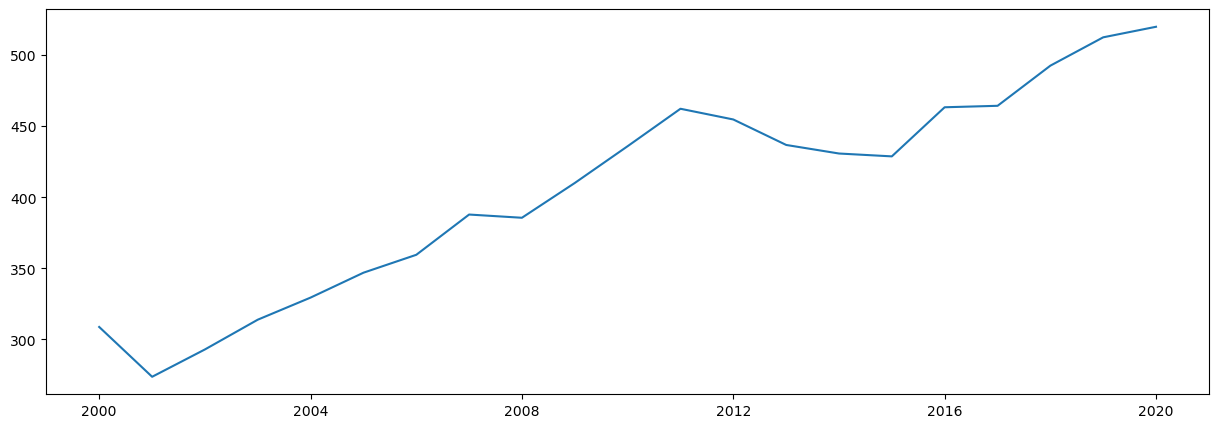

In [7]:
# Representação Gráfica da geração de energias renovável no Brasil de 2000 à 2020
plt.figure(figsize=(15, 5))
plt.plot(energia_renovavel)

In [67]:
# Criando o modelo Arima não sazonal
stepwise_model = auto_arima(energia_renovavel, start_p=1,start_q=1,start_d= 0, start_P=0, max_p=6, max_q=6, seasonal=False, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=175.328, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=177.290, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=179.281, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=177.290, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=179.289, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=181.000, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=179.286, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=181.250, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=182.106, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=179.994

In [68]:
# Visualizando o modelo mais eficiente
stepwise_model.aic()

175.32782523668587

In [69]:
# Separando os dados para treino e teste
train = energia_renovavel.loc[:'2017-01-01']
test = energia_renovavel.loc['2018-01-01':]

In [70]:
# Visualizando dados de treino
train

Year
2000-01-01    308.77
2001-01-01    273.71
2002-01-01    292.95
2003-01-01    313.88
2004-01-01    329.43
2005-01-01    346.96
2006-01-01    359.55
2007-01-01    387.88
2008-01-01    385.61
2009-01-01    410.13
2010-01-01    435.99
2011-01-01    462.32
2012-01-01    454.78
2013-01-01    436.84
2014-01-01    430.82
2015-01-01    428.81
2016-01-01    463.37
2017-01-01    464.40
Name: Electricity from renewables (TWh), dtype: float64

In [71]:
# Visualizando dados de teste
test

Year
2018-01-01    492.66
2019-01-01    512.59
2020-01-01    520.01
Name: Electricity from renewables (TWh), dtype: float64

In [72]:
# Treinando o modelo com dados históricos de treino
stepwise_model.fit(train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [73]:
# Criando predição de dados e alocando em uma variável
future_forecast = stepwise_model.predict(n_periods=7)

In [74]:
# Visualizando dados da previsão
future_forecast

2018-01-01    473.554706
2019-01-01    482.709412
2020-01-01    491.864118
2021-01-01    501.018824
2022-01-01    510.173529
2023-01-01    519.328235
2024-01-01    528.482941
Freq: AS-JAN, dtype: float64

In [75]:
future_forecast = pd.DataFrame(future_forecast, columns=['Renovaveis Prevista'])

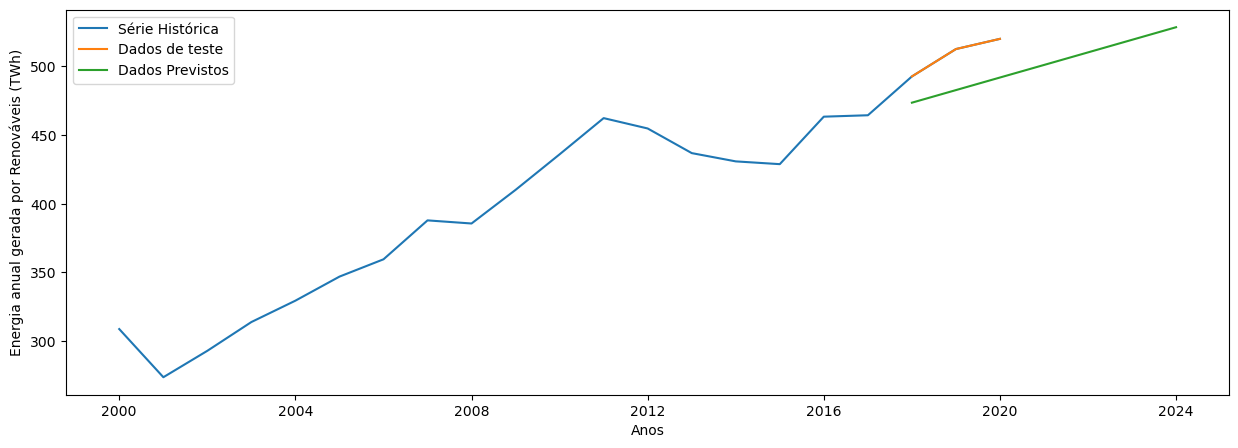

In [76]:
# Representação Gráfica da série temporal, dados de teste e previsão gerada
plt.figure(figsize=(15, 5))
plt.plot(energia_renovavel, label='Série Histórica')
plt.plot(test, label='Dados de teste')
plt.plot(future_forecast, label='Dados Previstos')

plt.xlabel('Anos')
plt.ylabel('Energia anual gerada por Renováveis (TWh)')
plt.legend()